In [1]:
import cmath
import networkx as nx
import matplotlib.pyplot as plt
import sympy as sp

# Opgave 1

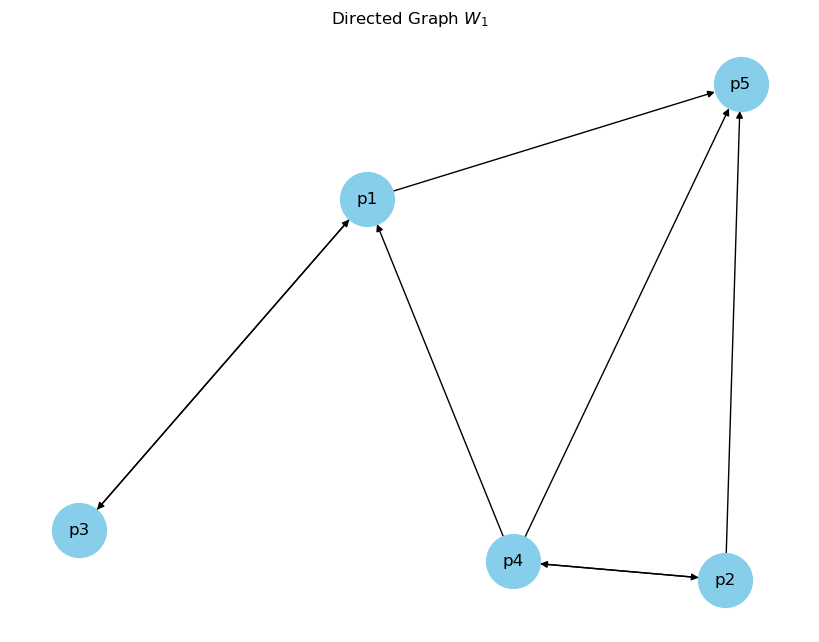

In [ ]:
G = nx.DiGraph()

nodes = ['p1', 'p2', 'p3', 'p4', 'p5']
G.add_nodes_from(nodes)

edges = [('p1', 'p3'), ('p1', 'p5'),
         ('p2', 'p4'), ('p2', 'p5'),
         ('p3', 'p1'),
         ('p4', 'p1'), ('p4', 'p2'), ('p4', 'p5')]

G.add_edges_from(edges)

pos = nx.spring_layout(G, seed=42)
plt.figure(figsize=(8, 6))
nx.draw(G, pos, with_labels=True, arrows=True, node_color='skyblue', node_size=1500, font_size=12)
plt.title("Directed Graph $W_1$")
plt.show()


# Opgave 2

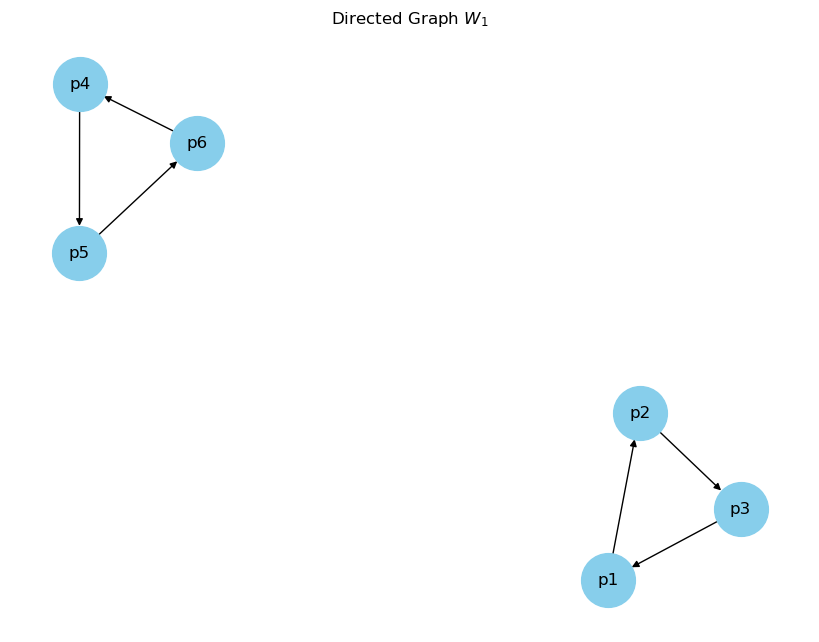

In [3]:
G = nx.DiGraph()

nodes = ['p1', 'p2', 'p3', 'p4', 'p5', 'p6']
G.add_nodes_from(nodes)

edges = [('p1', 'p2'),
         ('p2', 'p3'),
         ('p3', 'p1'),
         ('p4', 'p5'),
         ('p5', 'p6'),
         ('p6', 'p4')]

G.add_edges_from(edges)

pos = nx.spring_layout(G, seed=42)
plt.figure(figsize=(8, 6))
nx.draw(G, pos, with_labels=True, arrows=True, node_color='skyblue', node_size=1500, font_size=12)
plt.title("Directed Graph $W_1$")
plt.show()


# Opgave 3